## Assignment 1: Perceptron Training
Neural Networks and Computational Intelligence

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
## a) Generate artificial data sets
P = 5      # number of feature vectors 
N = 3      # dim of feature vectors
def datasets(N,P):
    D = np.zeros((N+1, P))       # empty data set (each column is a vector, last el. is the label)
    for mu in range(P):
        D[:-1, mu] = np.random.normal(0, 1, size = N)
        D[-1, mu] = np.random.randint(2, size = 1)        # the labels are 0 and 1 not -+1
        if D[-1, mu] == 0:
            D[-1, mu] = -1
    return D
D = datasets(N,P)
print(D)

[[-0.2445634  -1.18790549  0.75241883  1.87575233 -0.39867407]
 [-1.64709781 -1.12283761 -0.49421073 -1.53760408 -2.14329634]
 [-0.05134938  0.33884293 -0.31868226  1.38012926  0.7576073 ]
 [-1.          1.          1.          1.         -1.        ]]


In [26]:
## b) Sequential perceptron training

n_max = 2     # max number of epochs (loops through D)
n = 1           # epoch counter
t = 0
while n <= n_max:
    print('epoch', n)
    for p in range(P):
        t += 1
        mu = (t-1) % P
        print('mu = ', mu, ':', D[:-1, mu])
    print(t)    
    n += 1


epoch 1
mu =  0 : [-0.2445634  -1.64709781 -0.05134938]
mu =  1 : [-1.18790549 -1.12283761  0.33884293]
mu =  2 : [ 0.75241883 -0.49421073 -0.31868226]
mu =  3 : [ 1.87575233 -1.53760408  1.38012926]
mu =  4 : [-0.39867407 -2.14329634  0.7576073 ]
5
epoch 2
mu =  0 : [-0.2445634  -1.64709781 -0.05134938]
mu =  1 : [-1.18790549 -1.12283761  0.33884293]
mu =  2 : [ 0.75241883 -0.49421073 -0.31868226]
mu =  3 : [ 1.87575233 -1.53760408  1.38012926]
mu =  4 : [-0.39867407 -2.14329634  0.7576073 ]
10


In [27]:
## c) Rosenblatt algorithm
def Ros_alg(N, P, D, n_max):
    w = np.zeros(N)      # weight vector
    E_mu = np.zeros(P)    # local potentials (one per input vector)
    n = 0
    success = False
    while n < n_max*P:
        for p in range(P):
            n += 1
            mu = (n-1) % P
            #print(mu)
            if E_mu[mu] <= 0:
                w += (D[:-1, mu]) * D[-1, mu] / N
            E_mu[mu] = np.dot(w, D[:-1, mu]) * D[-1, mu]
            #print(E_mu)
        if not np.any(E_mu <= 0):
            success = True
            break
        
    return w, success

P = 5
N = 3
D = datasets(N,P)
w, s = Ros_alg(N, P, D, 10)


[1.   0.99 0.98 0.81 0.43 0.1  0.03 0.01 0.01 0.  ]


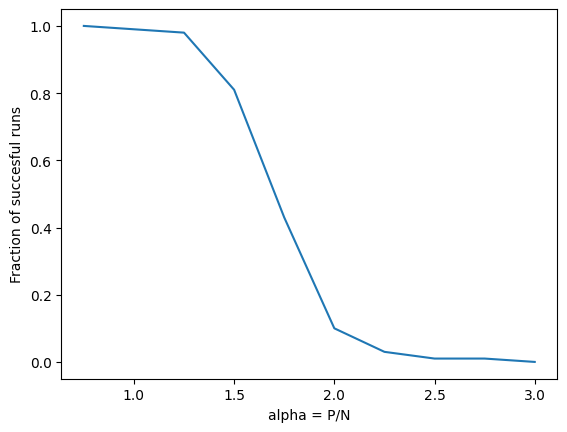

In [29]:
## d) Running the experiments

alpha = [0.25*i for i in range(3, 13)] #len 10
N = [20, 40]  
# P = alpha*N
n_D = 50    # number of random datasets for each P
n_max = 100     # max number of epochs 
succ_alpha = np.zeros(len(alpha))
for a in range(len(alpha)):
    successful_runs = 0
    for dim in range(len(N)):
        n_dim = N[dim]    
        P = int(n_dim*alpha[a])
        for d in range(n_D):
            D = datasets(n_dim, P)
            ww, ss= Ros_alg(n_dim, P, D, n_max)    #I think I dont need w for anything
            successful_runs += ss
    succ_alpha[a] += successful_runs / n_D
succ_alpha = succ_alpha/(len(N))      
print(succ_alpha)

plt.plot(alpha, succ_alpha)
plt.xlabel('alpha = P/N')
plt.ylabel('Fraction of succesful runs')
plt.show()
